In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN as DB
import time
import warnings

warnings.filterwarnings('ignore')

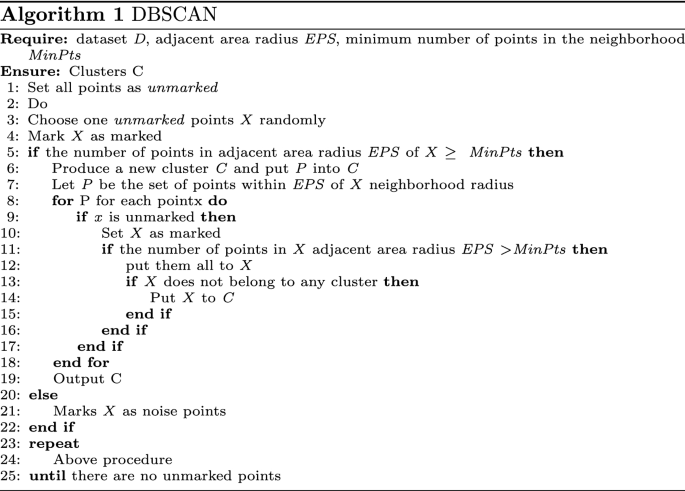

In [ ]:
def distances(object, data):
  euclidean = []
  for row in data:
    d = 0
    for i in range(data.shape[1]):
      d+=(row[i]-object[i])**2
    euclidean.append(d**0.5)
  return np.array(euclidean)

In [ ]:
def DBSCAN(data, epsilon=0.5, N=3):
  visited, noise = [], []
  clusters = []
  for i in range(data.shape[0]):
    if i not in visited:
      visited.append(i)
      d = distances(data[i], data)
      neighbors = list(np.where((d<=epsilon)&(d!=0))[0])
      if len(neighbors)<N:
        noise.append(i)
      else:
        cluster = [i]
        for neighbor in neighbors:
          if neighbor not in visited:
            visited.append(neighbor)
            d = distances(data[neighbor], data)
            neighbors_idx = list(np.where((d<=epsilon)&(d!=0))[0])
            if len(neighbors_idx)>=N:
              neighbors += neighbors_idx
          if not any(neighbor in cluster for cluster in clusters):
            cluster.append(neighbor)
        clusters.append(cluster)

  return clusters, noise

In [ ]:
plt.style.use('dark_background')

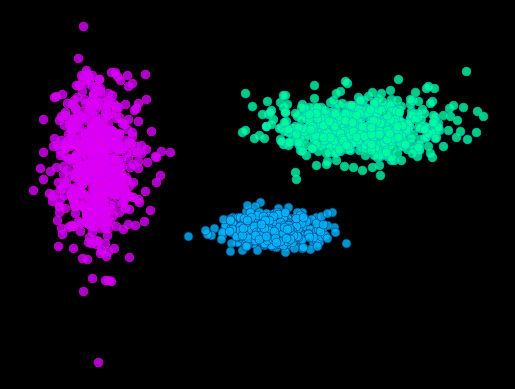

In [ ]:
X1 = [[x,y] for x, y in zip(np.random.normal(6,1, 600), np.random.normal(0,0.5, 600))]
X2 = [[x,y] for x, y in zip(np.random.normal(10,2, 600), np.random.normal(6,1, 600))]
X3 = [[x,y] for x, y in zip(np.random.normal(-2,1, 600), np.random.normal(4,2.5, 600))]

fig, ax = plt.subplots()
ax.scatter([x[0] for x in X1], [y[1] for y in X1], s=40, c='#00b8ff', edgecolors='#133e7c', linewidth=0.5, alpha=0.8)
ax.scatter([x[0] for x in X2], [y[1] for y in X2], s=40, c='#00ff9f', edgecolors='#0abdc6', linewidth=0.5, alpha=0.8)
ax.scatter([x[0] for x in X3], [y[1] for y in X3], s=40, c='#d600ff', edgecolors='#ea00d9', linewidth=0.5, alpha=0.8)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)

In [ ]:
data = np.array(X1+X2+X3)
clusters, outliers = DBSCAN(data, epsilon=1.5, N=5)

In [ ]:
def label(df, clusters, outliers):
  labels = [f'Cluster_{i}' for i in range(len(clusters))]
  for i, cluster in enumerate(clusters):
    for j in cluster:
      df.loc[j, 'cluster'] = labels[i]

  for i in outliers:
    df.loc[i, 'cluster'] = 'Outlier'
  return df

In [ ]:
df = pd.DataFrame(data, columns=['X', 'Y'])
df = label(df, clusters, outliers)
df

,X,Y,cluster
0,6.949835,0.443595,Cluster_0
1,6.890637,-0.510918,Cluster_0
2,5.177647,-0.711337,Cluster_0
3,4.974832,0.806737,Cluster_0
4,6.032298,-0.493713,Cluster_0
...,...,...,...
1795,-1.932934,4.357338,Cluster_2
1796,-0.935531,2.496138,Cluster_2
1797,0.407819,1.157170,Cluster_2
1798,-2.040746,-0.879241,Cluster_2


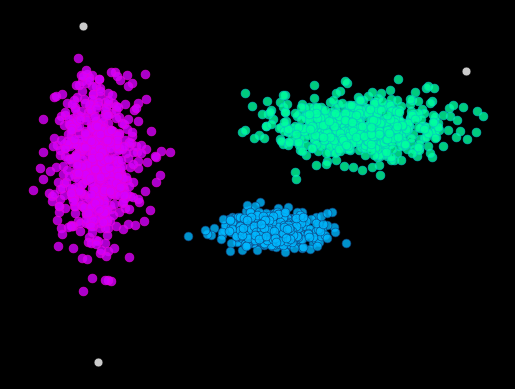

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df.X[df.cluster=='Cluster_0'], df.Y[df.cluster=='Cluster_0'], s=40, c='#00b8ff', edgecolors='#133e7c', linewidth=0.5, alpha=0.8)
ax.scatter(df.X[df.cluster=='Cluster_1'], df.Y[df.cluster=='Cluster_1'], s=40, c='#00ff9f', edgecolors='#0abdc6', linewidth=0.5, alpha=0.8)
ax.scatter(df.X[df.cluster=='Cluster_2'], df.Y[df.cluster=='Cluster_2'], s=40, c='#d600ff', edgecolors='#ea00d9', linewidth=0.5, alpha=0.8)
ax.scatter(df.X[df.cluster=='Outlier'], df.Y[df.cluster=='Outlier'], s=40, c='white', edgecolors='black', linewidth=0.5, alpha=0.8)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)

In [ ]:
np.unique(clustering.labels_)

array([-1,  0,  1,  2])

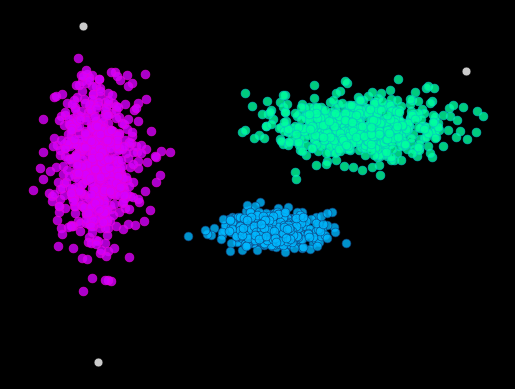

In [ ]:
clustering = DB(eps=1.5, min_samples=5).fit(data)

df2 = pd.DataFrame(data, columns=['X', 'Y'])
df2['cluster'] = clustering.labels_
fig, ax = plt.subplots()
ax.scatter(df2.X[df2.cluster==0], df2.Y[df2.cluster==0], s=40, c='#00b8ff', edgecolors='#133e7c', linewidth=0.5, alpha=0.8)
ax.scatter(df2.X[df2.cluster==1], df2.Y[df2.cluster==1], s=40, c='#00ff9f', edgecolors='#0abdc6', linewidth=0.5, alpha=0.8)
ax.scatter(df2.X[df2.cluster==2], df2.Y[df2.cluster==2], s=40, c='#d600ff', edgecolors='#ea00d9', linewidth=0.5, alpha=0.8)
ax.scatter(df2.X[df2.cluster==-1], df.Y[df2.cluster==-1], s=40, c='white', edgecolors='black', linewidth=0.5, alpha=0.8)
ax.spines[['right', 'top', 'bottom', 'left']].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('black')
ax.patch.set_alpha(0.7)